In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

mean=0
std_dev = 1
num_samples = 10000

data = np.random.normal(mean, std_dev, num_samples)

print(f"Mean: {np.mean(data):.4f}")
print(f"Std Dev: {np.std(data):.4f}")
print(f"Min: {np.min(data):.4f}")
print(f"Max: {np.max(data):.4f}")

Mean: -0.0021
Std Dev: 1.0034
Min: -3.9224
Max: 3.9262


In [5]:
x = [1, 2, 3, 4, 5]
print(x)

[1, 2, 3, 4, 5]


Text(0, 0.5, 'Frequency (Density)')

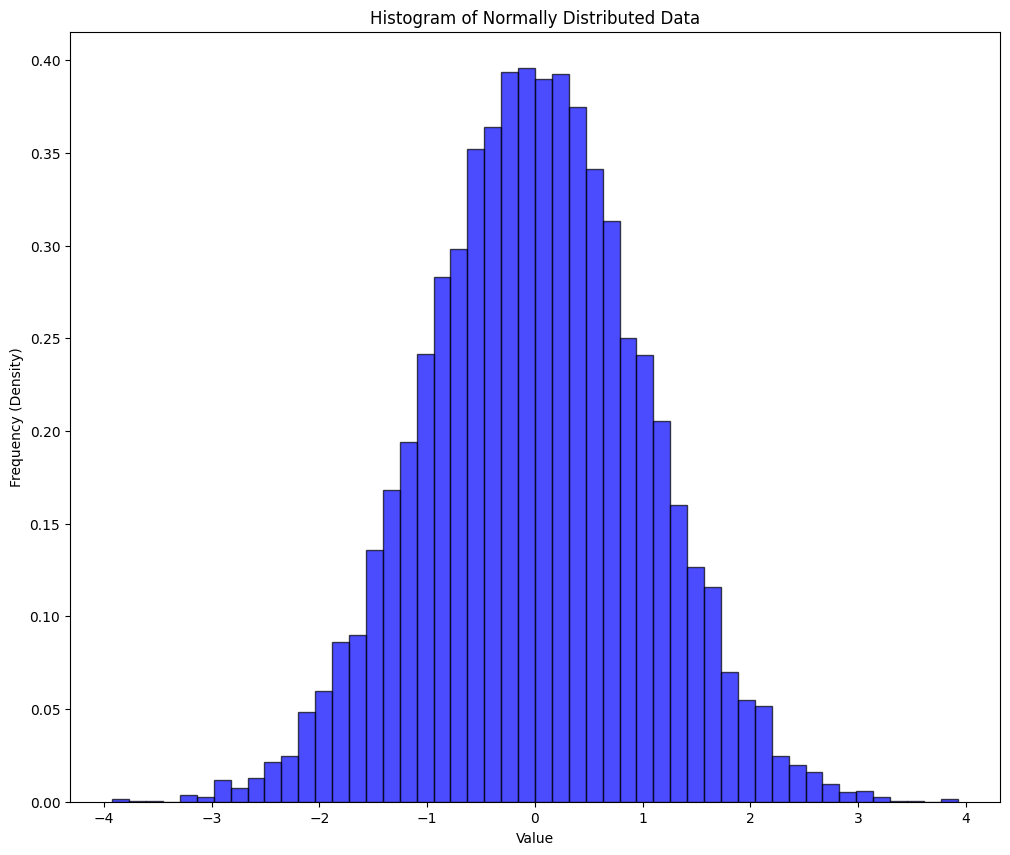

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
axes.hist(data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

axes.set_title('Histogram of Normally Distributed Data')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency (Density)')

In [17]:
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, mean, std_dev)
axes.plot(x, y, 'r-', linewidth=2, label='Normal Distribution Curve')
axes.hist(data, bins=50, density=True, alpha=0.5, color='orange', edgecolor='black')
axes.set_title('Histogram with Normal Curve')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency (Density)')
axes.legend()
plt.show()

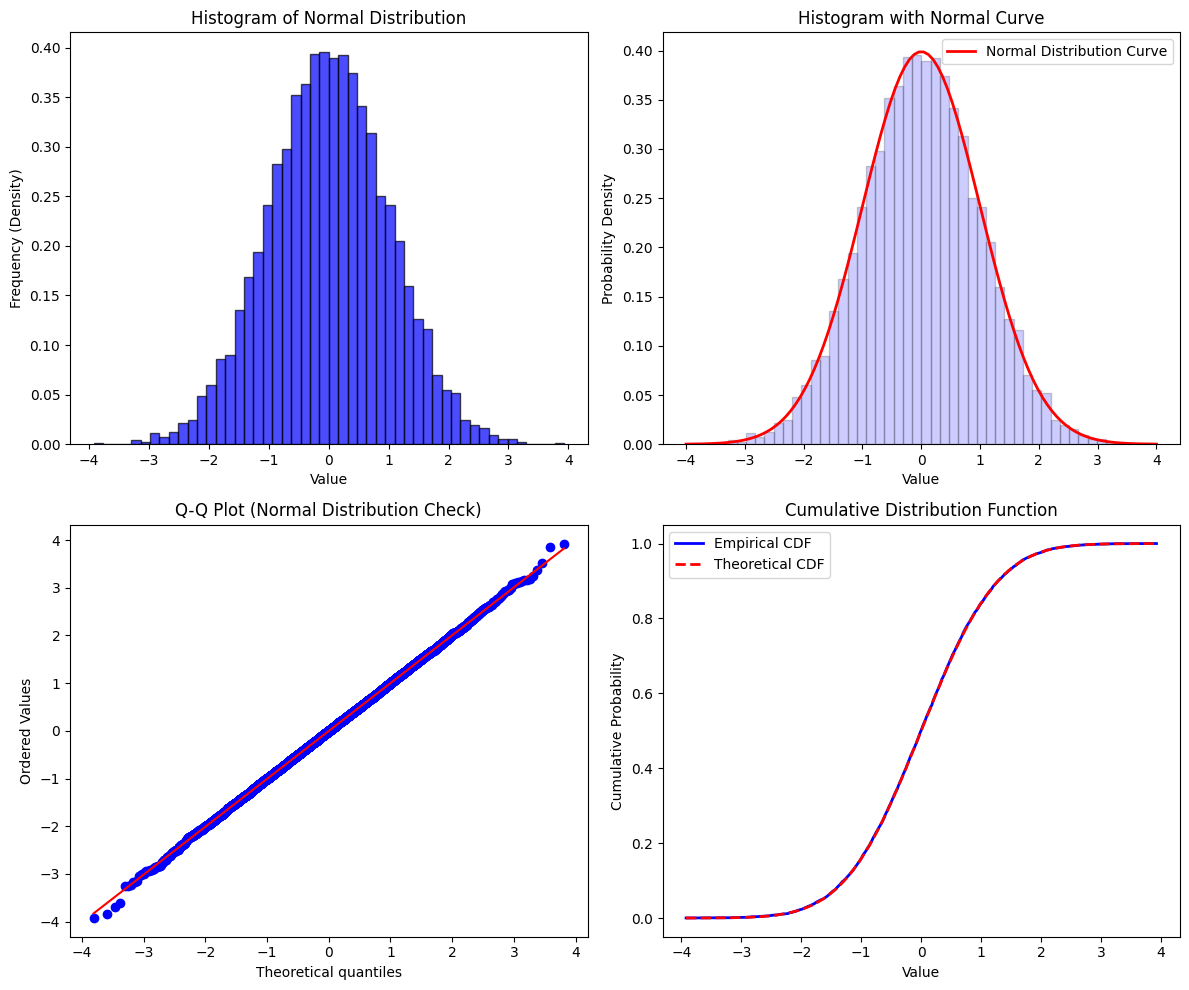

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Histogram
axes[0, 0].hist(data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Histogram of Normal Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency (Density)')

# Plot 2: Normal distribution curve overlay
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, mean, std_dev)
axes[0, 1].plot(x, y, 'r-', linewidth=2, label='Normal Distribution Curve')
axes[0, 1].hist(data, bins=50, density=True, alpha=0.2, color='blue', edgecolor='black')
axes[0, 1].set_title('Histogram with Normal Curve')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].legend()
stats.probplot(data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution Check)')
# fourth plot: Box plot

sorted_data = np.sort(data)
y_cumsum = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, y_cumsum, 'b-', linewidth=2, label='Empirical CDF')
theoretical_cdf = stats.norm.cdf(sorted_data, mean, std_dev)
axes[1, 1].plot(sorted_data, theoretical_cdf, 'r--', linewidth=2, label='Theoretical CDF')
axes[1, 1].set_title('Cumulative Distribution Function')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [28]:
daily_returns = np.random.normal(0.001, 0.02, 252)  # 1 year of trading days
# mean = 0.1% daily return, std = 2%, 252 trading days

# Calculate probability of extreme moves
extreme_moves = np.sum(np.abs(daily_returns) > 0.05)  # moves > 5%
prob_extreme = extreme_moves / len(daily_returns)

print(f"\nStock Return Analysis:")
print(f"Average daily return: {np.mean(daily_returns)*100:.3f}%")
print(f"Daily volatility: {np.std(daily_returns)*100:.3f}%")
print(f"Probability of move > 5%: {prob_extreme*100:.2f}%")



Stock Return Analysis:
Average daily return: 0.025%
Daily volatility: 1.987%
Probability of move > 5%: 1.59%


In [29]:
#Z-scores 
z_scores = (daily_returns-np.mean(daily_returns)) / np.std(daily_returns)
extreme_z = np.sum(np.abs(z_scores) > 2)  # Z-score > 2 or < -2
#prob_extreme_z = extreme_z / len(daily_returns)

print(f"Days with |Z| > 2: {extreme_z} out of {len(z_scores)}")

Days with |Z| > 2: 10 out of 252


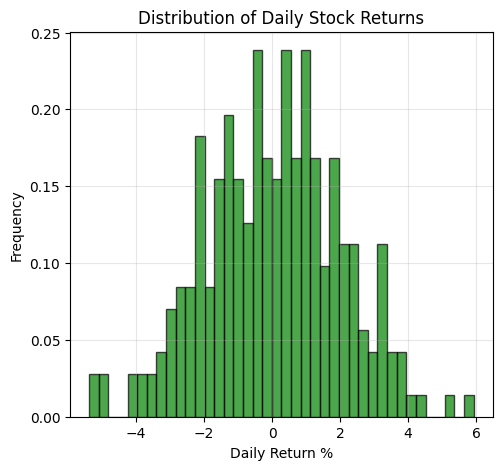

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(daily_returns * 100, bins=40, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Daily Return %')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Stock Returns')
plt.grid(alpha=0.3)

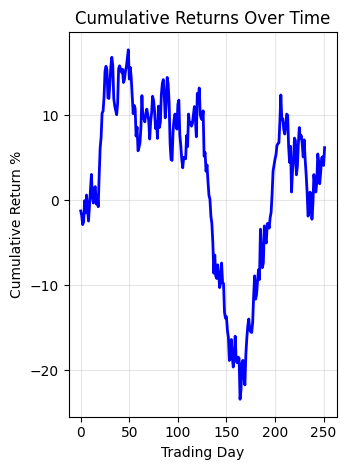

In [31]:
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(daily_returns) * 100, linewidth=2, color='blue')
plt.xlabel('Trading Day')
plt.ylabel('Cumulative Return %')
plt.title('Cumulative Returns Over Time')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()